<a href="https://colab.research.google.com/github/UtkarshAIITB/IPL-Data-Analysis/blob/main/DL_byball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
new = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPL Score_Analysis/CSV/new.csv')
# new.head()

In [4]:
t = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPL Score_Analysis/CSV/t.csv')
# t.head()

In [5]:
t.drop(columns = ['Unnamed: 0'], inplace = True)
t.head()

,id,date,team1,team2,toss_winner,winner,inning,over,batting_team,bowling_team,year,field,D/L,eliminator?,total_runs_y,cum_total,cum_wicket
0,1175356,2019-03-23,12,5,12,12,1,0.1,5,12,2019,1,0,0,70,1,0
1,1175356,2019-03-23,12,5,12,12,1,0.2,5,12,2019,1,0,0,70,1,0
2,1175356,2019-03-23,12,5,12,12,1,0.3,5,12,2019,1,0,0,70,1,0
3,1175356,2019-03-23,12,5,12,12,1,0.4,5,12,2019,1,0,0,70,1,0
4,1175356,2019-03-23,12,5,12,12,1,0.5,5,12,2019,1,0,0,70,5,0


In [6]:
new.drop(columns = ['Unnamed: 0'], inplace = True)

In [7]:
new.head()

,id,date,team1,team2,toss_winner,winner,inning,over,batting_team,bowling_team,year,field,D/L,eliminator?,total_runs_y,cum_total,cum_wicket
0,335982,2008-04-18,5,9,5,9,1,0.1,9,5,2008,1,0,0,222,1,0
1,335982,2008-04-18,5,9,5,9,1,0.2,9,5,2008,1,0,0,222,1,0
2,335982,2008-04-18,5,9,5,9,1,0.3,9,5,2008,1,0,0,222,2,0
3,335982,2008-04-18,5,9,5,9,1,0.4,9,5,2008,1,0,0,222,2,0
4,335982,2008-04-18,5,9,5,9,1,0.5,9,5,2008,1,0,0,222,2,0


In [8]:
# new is the training set and t is the test set

In [9]:
tnew = t.drop(t[(t.over < 15.5) | (t.over >=15.6)].index)
tnew.reset_index(drop = True)
y1test = tnew['total_runs_y']
y2test = tnew['winner']
id_test = tnew['id'].reset_index(drop = True)
id_test = id_test.to_frame().reset_index(drop=True)
tnew.drop(columns = ['id', 'date', 'year', 'total_runs_y', 'winner'], inplace = True)
tnew.reset_index(drop=True).head()

,team1,team2,toss_winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,cum_total,cum_wicket
0,12,5,12,1,15.5,5,12,1,0,0,68,8
1,12,5,12,2,15.5,12,5,1,0,0,67,3
2,9,7,9,1,15.5,7,9,1,0,0,144,1
3,9,7,9,2,15.5,9,7,1,0,0,119,4
4,13,6,13,1,15.5,6,13,1,0,0,139,4


In [10]:
xnew = new.drop(new[(new.over < 15.5) | (new.over >=15.6)].index)
xnew.reset_index(drop = True)
y1train = xnew['total_runs_y']
y2train = xnew['winner']
xnew.drop(columns = ['id', 'date', 'year', 'total_runs_y', 'winner'], inplace = True)
xnew.reset_index(drop=True).head()

,team1,team2,toss_winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,cum_total,cum_wicket
0,5,9,5,1,15.5,9,5,1,0,0,158,2
1,8,12,12,1,15.5,12,8,0,0,0,168,5
2,8,12,12,2,15.5,8,12,0,0,0,174,3
3,6,11,11,1,15.5,11,6,0,0,0,104,7
4,13,5,13,1,15.5,13,5,0,0,0,110,4


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [12]:
xnewt = sc.fit_transform(xnew)    #2019 data
tnewt = sc.fit_transform(tnew)    #2008-2020 data

In [13]:
print(xnew.shape)
print(tnew.shape)

(1403, 12)
(116, 12)


# Score Prediction

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

## Training Model

In [15]:
# model = Sequential()
# # model.add(Dense(88, activation = 'relu'))
# # model.add(Dropout(0.5))

# model.add(Dense(50, activation = 'relu'))
# model.add(Dropout(0.5))

# model.add(Dense(25, activation = 'relu'))
# # model.add(Dropout(0.5))

# model.add(Dense(12, activation = 'relu'))
# # model.add(Dropout(0.5))

# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')
model = Sequential()
# model.add(Dense(88, activation = 'relu'))
# model.add(Dropout(0.5))

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [16]:
history= model.fit(x=xnewt, y=y1train, epochs=2000, 
          validation_data=(tnewt,y1test))

Epoch 1/2000
44/44 [==============================] - 3s 8ms/step - loss: 18018.4453 - val_loss: 3173.2986
Epoch 2/2000
44/44 [==============================] - 0s 5ms/step - loss: 4831.2437 - val_loss: 3669.4819
Epoch 3/2000
44/44 [==============================] - 0s 5ms/step - loss: 3814.2410 - val_loss: 3178.8938
Epoch 4/2000
44/44 [==============================] - 0s 5ms/step - loss: 3411.3987 - val_loss: 2874.8604
Epoch 5/2000
44/44 [==============================] - 0s 5ms/step - loss: 3124.0759 - val_loss: 1571.9567
Epoch 6/2000
44/44 [==============================] - 0s 5ms/step - loss: 2816.3281 - val_loss: 1965.2710
Epoch 7/2000
44/44 [==============================] - 0s 5ms/step - loss: 2564.7998 - val_loss: 3053.4834
Epoch 8/2000
44/44 [==============================] - 0s 5ms/step - loss: 2560.0981 - val_loss: 1786.8796
Epoch 9/2000
44/44 [==============================] - 0s 5ms/step - loss: 2236.3411 - val_loss: 2581.0137
Epoch 10/2000
44/44 [========================

In [17]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


In [18]:
# model.summary()

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               3

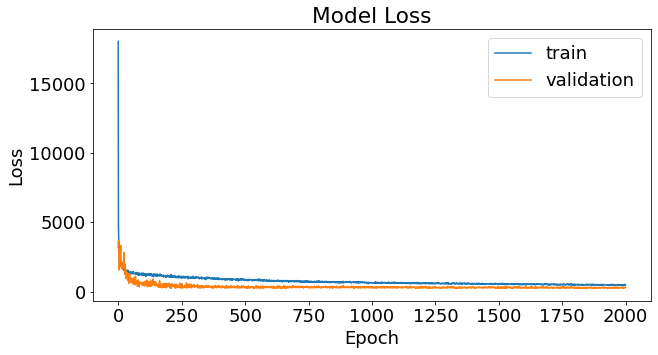

In [20]:
# plt.figure(figsize=(16,8))
plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 18})
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/IPL Score_Analysis/Plots/nn_model_score_byball.png')
plt.show()

In [21]:
y1test = y1test.ravel()

In [22]:
predictions = model.predict(tnewt)
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=y1test
sample.head(10)

,Predict,Actual
0,101.575577,70
1,110.348579,71
2,183.766754,181
3,152.148499,183
4,167.989655,213
5,168.644852,176
6,178.245087,184
7,167.001328,170
8,156.903931,147
9,152.662262,150


In [23]:
def custom_accuracy(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

In [24]:
custom_accuracy(sample['Actual'] , sample['Predict'],12)

53.44827586206896

In [25]:
# df.loc[len(df)] = your_array
# results.loc[len(results)] = res2
# df.append(pd.DataFrame(arr).T)
# results = results.append(pd.DataFrame(res2))
# results.append(pd.DataFrame(res3))

In [26]:
ar1 = sample['Actual'].unique()
results = pd.DataFrame()
for items in ar1:
  # print(items)
  try2 = sample[sample.Actual == items]
  result = (try2.sum())/try2.shape[0]
  # print(result)
  res = result.values.reshape(1,2)
  # print(res)
  results = results.append(pd.DataFrame(res))

In [27]:
# rankings_pd.rename(columns = {'test':'TEST'}, inplace = True)
results.rename(columns = {0: 'Predict',
                          1: 'Actual'
                          }, inplace = True)

In [28]:
results.reset_index(drop = True).head()

,Predict,Actual
0,101.575577,70.0
1,110.348579,71.0
2,168.347382,181.0
3,159.547913,183.0
4,174.168640,213.0


In [29]:
print(custom_accuracy(results['Actual'].ravel(),results['Predict'].ravel(),12))

50.0


In [30]:
 # results.info()

In [31]:
# results['Actual']

## Test Data set (2021)

In [32]:
tests = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPL Score_Analysis/CSV/testset.csv')
# tests.head()
tests.drop(columns = ['Unnamed: 0'], inplace = True)
tests.head()

,id,date,team1,team2,toss_winner,winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,total_runs_y,cum_total,cum_wicket
0,1254058,2021-04-09,12,5,5,5,1,0.1,12,5,1,0,0,159,2,0
1,1254058,2021-04-09,12,5,5,5,1,0.2,12,5,1,0,0,159,2,0
2,1254058,2021-04-09,12,5,5,5,1,0.3,12,5,1,0,0,159,2,0
3,1254058,2021-04-09,12,5,5,5,1,0.4,12,5,1,0,0,159,4,0
4,1254058,2021-04-09,12,5,5,5,1,0.5,12,5,1,0,0,159,4,0


In [33]:
sets = tests.drop(tests[(tests.over < 15.5) | (tests.over >=15.6)].index)
sets.reset_index(drop = True)
yt1 = sets['total_runs_y']
yt2 = sets['winner']
tt_2021 = tests['id'].reset_index(drop = True)
tt_2021 = tt_2021.to_frame().reset_index(drop = True)
sets.drop(columns = ['id', 'date', 'total_runs_y', 'winner'], inplace = True)
sets.reset_index(drop=True).head()

,team1,team2,toss_winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,cum_total,cum_wicket
0,12,5,5,1,15.5,12,5,1,0,0,135,3
1,12,5,5,2,15.5,5,12,1,0,0,120,5
2,11,6,6,1,15.5,11,6,1,0,0,142,6
3,11,6,6,2,15.5,6,11,1,0,0,157,1
4,9,7,7,1,15.5,9,7,1,0,0,151,2


In [34]:
sets.shape

(41, 12)

In [35]:
yt1 = yt1.ravel()

In [36]:
xs = sc.fit_transform(sets)

In [37]:
predictions = model.predict(xs)
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=yt1
sample.head(10)

,Predict,Actual
0,177.922104,159
1,146.403519,160
2,176.317825,188
3,177.874512,190
4,184.392273,187
5,154.469696,177
6,188.760071,221
7,185.767670,217
8,155.855560,152
9,154.978577,142


In [38]:
ar1 = sample['Actual'].unique()
results = pd.DataFrame()
for items in ar1:
  # print(items)
  try2 = sample[sample.Actual == items]
  result = (try2.sum())/try2.shape[0]
  # print(result)
  res = result.values.reshape(1,2)
  # print(res)
  results = results.append(pd.DataFrame(res))

In [39]:
results.rename(columns = {0: 'Predict',
                          1: 'Actual'
                          }, inplace = True)
results.reset_index(drop = True)
print(custom_accuracy(results['Actual'].ravel(),results['Predict'].ravel(),12))

52.94117647058824


# Winner Prediction

In [40]:
model = Sequential()
# model.add(Dense(88, activation = 'relu'))
# model.add(Dropout(0.5))

model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(25, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(14, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='sgd', metrics = ['accuracy'])

In [41]:
win_pred = model.fit(x=xnewt, y=y2train, epochs=1200, 
          validation_data=(tnewt,y2test))

Epoch 1/1200
44/44 [==============================] - 1s 7ms/step - loss: 2.8735 - accuracy: 0.0392 - val_loss: 2.6384 - val_accuracy: 0.0431
Epoch 2/1200
44/44 [==============================] - 0s 3ms/step - loss: 2.7356 - accuracy: 0.0684 - val_loss: 2.5778 - val_accuracy: 0.0690
Epoch 3/1200
44/44 [==============================] - 0s 3ms/step - loss: 2.6866 - accuracy: 0.0891 - val_loss: 2.5394 - val_accuracy: 0.1293
Epoch 4/1200
44/44 [==============================] - 0s 4ms/step - loss: 2.6420 - accuracy: 0.0969 - val_loss: 2.5071 - val_accuracy: 0.1466
Epoch 5/1200
44/44 [==============================] - 0s 3ms/step - loss: 2.6055 - accuracy: 0.1062 - val_loss: 2.4821 - val_accuracy: 0.1552
Epoch 6/1200
44/44 [==============================] - 0s 3ms/step - loss: 2.5829 - accuracy: 0.1119 - val_loss: 2.4628 - val_accuracy: 0.1724
Epoch 7/1200
44/44 [==============================] - 0s 4ms/step - loss: 2.5463 - accuracy: 0.1183 - val_loss: 2.4415 - val_accuracy: 0.1983
Epoch 

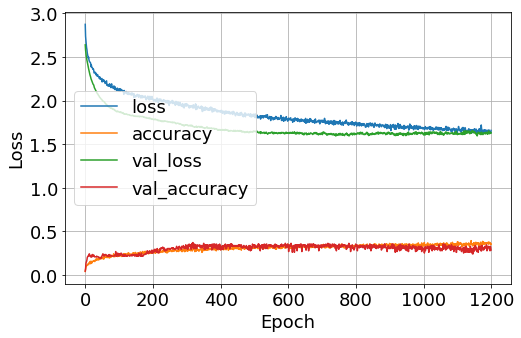

In [42]:
pd.DataFrame(win_pred.history).plot(figsize = (8,5))
# plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 15})
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.grid(True)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/IPL Score_Analysis/Plots/nn_winner_pred_byball.png')
plt.show()

In [43]:
y2test = y2test.ravel()

In [44]:
predictions = model.predict(tnewt)
class_pred = np.argmax(predictions, axis=1)
class_pred
# sample = pd.DataFrame(predictions,columns=['Predict'])
# sample['Actual']=y2test
# sample.head(10)

array([11,  5,  6,  8,  5,  5,  9,  9, 13, 13,  8,  8, 13, 13, 11, 11, 12,
        6,  8,  5,  5,  5, 11, 12,  5,  5, 11, 11, 13, 13,  5,  5,  5,  8,
       11, 11,  5, 13,  5,  5,  9,  7,  6, 11,  9, 11, 11, 12, 11,  5,  5,
       13, 13,  5,  5,  9,  9,  5,  5,  5, 13,  9, 11,  5,  5,  5, 13,  5,
        8, 12, 12,  5,  5,  8, 13,  5, 11,  5,  6, 12,  5,  5,  9,  9, 13,
       13, 11, 11,  5,  5,  9, 11,  5,  6,  5, 13, 11, 12,  9,  9,  5, 12,
        5,  5, 12,  6, 11, 12, 13, 13,  5,  5, 12, 13, 13, 13])

In [45]:
# proba = predictions.round(2)
# proba

In [46]:
sample = pd.DataFrame(class_pred,columns=['Predict'])
sample['Actual']=y2test
# sample.head()

In [47]:
# frames = [id_test, sample]
# final = pd.concat(frames, axis = 1)
# # final.head()
# ar1 = final['id'].unique()
# winner = pd.DataFrame()
# for items in ar1:
#   # print(items)
#   try2 = final[final.id == items]
#   # try2.drop(columns = 'id', inplace = True)
#   hapi = try2.drop(columns = ['id']).reset_index(drop=True)
#   result = (hapi.sum())/hapi.shape[0]
#   # print(result)
#   res = result.values.reshape(1,2)
#   # print(res)
#   winner = winner.append(pd.DataFrame(res))
  
# winner.rename(columns = {0: 'Predict',
#                           1: 'Actual'
#                           }, inplace = True)
# winner.reset_index(drop = True)

# winner['diff'] = abs(winner['Actual'] - winner['Predict'])
# to = winner.shape[0]
# print( ((winner[(winner['diff'])<1].shape[0])/to)*100 )

In [48]:
# final.to_csv('final.csv')

In [49]:
test_pred = model.predict(xs)
class_pred = np.argmax(test_pred, axis=1)
sample = pd.DataFrame(class_pred,columns=['Predict'])
yt2 = yt2.ravel()
sample['Actual']=yt2

In [50]:
frames = [tt_2021, sample]
final = pd.concat(frames, axis = 1)
# final.head()
ar1 = final['id'].unique()
winner = pd.DataFrame()
for items in ar1:
  # print(items)
  try2 = final[final.id == items]
  # try2.drop(columns = 'id', inplace = True)
  hapi = try2.drop(columns = ['id']).reset_index(drop=True)
  result = (hapi.sum())/hapi.shape[0]
  # print(result)
  res = result.values.reshape(1,2)
  # print(res)
  winner = winner.append(pd.DataFrame(res))
  
winner.rename(columns = {0: 'Predict',
                          1: 'Actual'
                          }, inplace = True)
winner.reset_index(drop = True)

winner['diff'] = abs(winner['Actual'] - winner['Predict'])
to = winner.shape[0]
print( ((winner[(winner['diff'])<1].shape[0])/to)*100 )

100.0


In [51]:
winner.shape

(21, 3)